In [61]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor


In [62]:
series = read_csv('C:\\Dosyalar\\stuff\\ders\\csv files\\daily-total-female-births.csv', header=0, index_col=0)
values = series.values

In [63]:
def to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    agg = concat(cols, axis=1)
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [64]:
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]


In [65]:
def xgboost_forecast(train, testX):
    train = asarray(train)
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(train[:, :-1], train[:, -1])
    yhat = model.predict(asarray([testX]))
    return yhat[0]

In [66]:
def walk_forward_validation(data, n_test):
    predictions = list()
    train, test = train_test_split(data, n_test)
    history = [x for x in train]
    for i in range(len(test)):
        testX = test[i, :-1]
        testy = test[i, -1] 
        yhat = xgboost_forecast(history, testX)
        predictions.append(yhat)
        history.append(test[i])
    print('>expected=%.1f, predicted=%.1f' % (testy, yhat))   
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions

>expected=50.0, predicted=47.2
MAE: 5.957


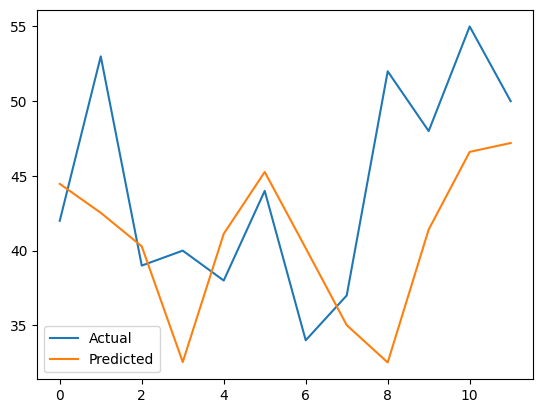

In [67]:
data = to_supervised(values, n_in=6)
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
pyplot.plot(y, label='Actual')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()